In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv", low_memory=False)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

df['Date'] = pd.to_datetime(df['Date']) # The data is changed to datetime var type
# Create a new column for the average salary and visualise it
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df.head()

The dataset has 318477 rows and 13 columns.


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


# SYDNEY

### AREA AND CLASSIFICATION

In [4]:
Sydney_Df = df[df['Location'].isna()==False]
Sydney_Df = Sydney_Df[Sydney_Df['Location'] == "Sydney"]

Sydney_AreaDf = Sydney_Df.groupby('Area').count()
Sydney_AreaDf['Area'] = Sydney_AreaDf.index
Sydney_AreaDf['Count'] = Sydney_AreaDf['Id']

Sydney_ClassDf = Sydney_Df.groupby('Classification').count()
Sydney_ClassDf['Classification'] = Sydney_ClassDf.index
Sydney_ClassDf['Count'] = Sydney_ClassDf['Id']

Sydney_HighSalDf = Sydney_Df.groupby('HighestSalary').count()
Sydney_HighSalDf['HighSal'] = Sydney_HighSalDf.index
Sydney_HighSalDf['Count'] = Sydney_HighSalDf['Id']

print(Sydney_Df.shape)
# Sydney_Df.head()

(60765, 14)


### JOB POSTING DATES

In [5]:
# Check the first and last data to decide the time steps 
# print("1st Date:")
# print(Sydney_Df['Date'].iloc[0].day)
# print(Sydney_Df['Date'].iloc[0].month)
# print(Sydney_Df['Date'].iloc[0].year)
# print("Last Date:")
# print(Sydney_Df['Date'].iloc[-1].day)
# print(Sydney_Df['Date'].iloc[-1].month)
# print(Sydney_Df['Date'].iloc[-1].year)

FMFH = 0
FMSH = 0
SMFH = 0
SMSH = 0

for i in range(len(Sydney_Df['Date'])):
    if Sydney_Df['Date'].iloc[i].month == 10 and Sydney_Df['Date'].iloc[i].day <= 15:
        FMFH += 1 #FIRST MONTH FIRST HALF
    elif Sydney_Df['Date'].iloc[i].month == 10 and Sydney_Df['Date'].iloc[i].day > 15 \
    and Sydney_Df['Date'].iloc[i].day <= 31:
        FMSH += 1 #SECOND MONTH SECOND HALF
    elif Sydney_Df['Date'].iloc[i].month == 11 and Sydney_Df['Date'].iloc[i].day <= 15:
        SMFH += 1
    elif Sydney_Df['Date'].iloc[i].month == 11 and Sydney_Df['Date'].iloc[i].day > 15 \
        and Sydney_Df['Date'].iloc[i].day <= 31:
        SMSH += 1
        
        
print(FMFH)
print(FMSH)
print(SMFH)
print(SMSH)

PostingData = {'PostDate': ['1st to 15th - 10 - 2018',
                                '16th to 31st - 10 - 2018',
                                '1st to 15th - 11 - 2018',
                                '16th to 30th - 11 - 2018'],
                   'PostFrequency': [FMFH, FMSH, SMFH, SMSH]}

Sydney_PostingData_Df = pd.DataFrame(PostingData)

Sydney_PostingData_Df = Sydney_PostingData_Df.sort_values(by="PostFrequency", ascending=False)

Sydney_PostingData_Df = Sydney_PostingData_Df[:3]
# Sydney_PostingData_Df.head()

15893
19086
12350
517


### HIGHEST SALARY RANGES

In [6]:
(H, edges) = np.histogram(Sydney_Df['HighestSalary'], 10)
print(edges)

range1_Count = 0
range2_Count = 0
range3_Count = 0
range4_Count = 0
range5_Count = 0
range6_Count = 0
range7_Count = 0
range8_Count = 0
range9_Count = 0
range10_Count = 0
for i in Sydney_Df['HighestSalary']:
    if i >= edges[0] and i <= edges[1]:
        range1_Count += 1
    elif i > edges[1] and i <= edges[2]:
        range2_Count += 1
    elif i > edges[2] and i <= edges[3]:
        range3_Count += 1
    elif i > edges[3] and i <= edges[4]:
        range4_Count += 1
    elif i > edges[4] and i <= edges[5]:
        range5_Count += 1
    elif i > edges[5] and i <= edges[6]:
        range6_Count += 1
    elif i > edges[6] and i <= edges[7]:
        range7_Count += 1 
    elif i > edges[7] and i <= edges[8]:
        range8_Count += 1 
    elif i > edges[8] and i <= edges[9]:
        range9_Count += 1 
    elif i > edges[9] and i <= edges[10]:
        range10_Count += 1 
print("Range 1:",range1_Count)
print("Range 2:",range2_Count)
print("Range 3:",range3_Count)
print("Range 4:",range4_Count)
print("Range 5:",range5_Count)
print("Range 6:",range6_Count)
print("Range 7:",range7_Count)
print("Range 8:",range8_Count)
print("Range 9:",range9_Count)
print("Range 10:",range10_Count)

print("Sum of range frequency:",range1_Count+range2_Count+range3_Count+range4_Count+range5_Count+range6_Count+range7_Count+range8_Count+range9_Count+range10_Count)
print("Total number of values from Sydney data:",Sydney_Df.shape[0])

HighestSalary_Data = {'HighestSalaryRange':['{:f}-{:f}'.format(edges[0], edges[1]),
                                             '{:f}-{:f}'.format(edges[1], edges[2]),
                                             '{:f}-{:f}'.format(edges[2], edges[3]),
                                             '{:f}-{:f}'.format(edges[3], edges[4]),
                                             '{:f}-{:f}'.format(edges[4], edges[5]),
                                             '{:f}-{:f}'.format(edges[5], edges[6]),
                                             '{:f}-{:f}'.format(edges[6], edges[7]),
                                             '{:f}-{:f}'.format(edges[7], edges[8]),
                                             '{:f}-{:f}'.format(edges[8], edges[9]),
                                             '{:f}-{:f}'.format(edges[9], edges[10])],
                     'RangeFrequency':[range1_Count, range2_Count, range3_Count,
                                        range4_Count, range5_Count, range6_Count,
                                        range7_Count, range8_Count, range9_Count,
                                        range10_Count]}


# Sydney_HighestSalary_Df = pd.DataFrame(columns = ['Area', 'Classification','Highest Salary Range','Range Count'])
Sydney_HighestSalary_Df = pd.DataFrame(HighestSalary_Data)

[ 30.  126.9 223.8 320.7 417.6 514.5 611.4 708.3 805.2 902.1 999. ]
Range 1: 45592
Range 2: 11980
Range 3: 0
Range 4: 0
Range 5: 0
Range 6: 0
Range 7: 0
Range 8: 0
Range 9: 0
Range 10: 3193
Sum of range frequency: 60765
Total number of values from Sydney data: 60765


In [7]:
print(HighestSalary_Data['RangeFrequency'])

Sydney_HighestSalary_Df = Sydney_HighestSalary_Df.sort_values(by="RangeFrequency", ascending=False)
#Slicing out 0 values manually
Sydney_HighestSalary_Df = Sydney_HighestSalary_Df[:3]
Sydney_HighestSalary_Df.head(10)

[45592, 11980, 0, 0, 0, 0, 0, 0, 0, 3193]


,HighestSalaryRange,RangeFrequency
0,30.000000-126.900000,45592
1,126.900000-223.800000,11980
9,902.100000-999.000000,3193


In [8]:
#Sort by descending to have the top 5 AREAS at the top
Sydney_AreaDf = Sydney_AreaDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Sydney_AreaDf[:5].copy()
#Add a new row that will be all of the AREAS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Area' : ['others'],
                              'Count' : [Sydney_AreaDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Sydney_AreaDf = pd.concat([df2, new_row])

#Sort by descending to have the top 5 CLASSIFICATIONS at the top
Sydney_ClassDf = Sydney_ClassDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Sydney_ClassDf[:10].copy()
#Add a new row that will be all of the CLASSIFICATIONS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Classification' : ['others'],
                              'Count' : [Sydney_ClassDf['Count'][15:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Sydney_ClassDf = pd.concat([df2, new_row])
# Sydney_AreaDf.head(5)

In [9]:
#Group by average salary and count the numbers
SydneyAverageSalaryDf = Sydney_Df.groupby('AverageSalary').count()
SydneyAverageSalaryDf['AverageSalary'] = (SydneyAverageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
SydneyAverageSalaryDf['Count'] = SydneyAverageSalaryDf["Id"]
SydneyAverageSalaryDf

labels = SydneyAverageSalaryDf["AverageSalary"]
# labels = df.assign(AverageSalary = lambda row: row.AverageSalary)
print(labels)

AverageSalary
15.0      15,000
35.0      35,000
45.0      45,000
55.0      55,000
65.0      65,000
75.0      75,000
90.0      90,000
110.0    110,000
135.0    135,000
175.0    175,000
599.5    599,500
Name: AverageSalary, dtype: object


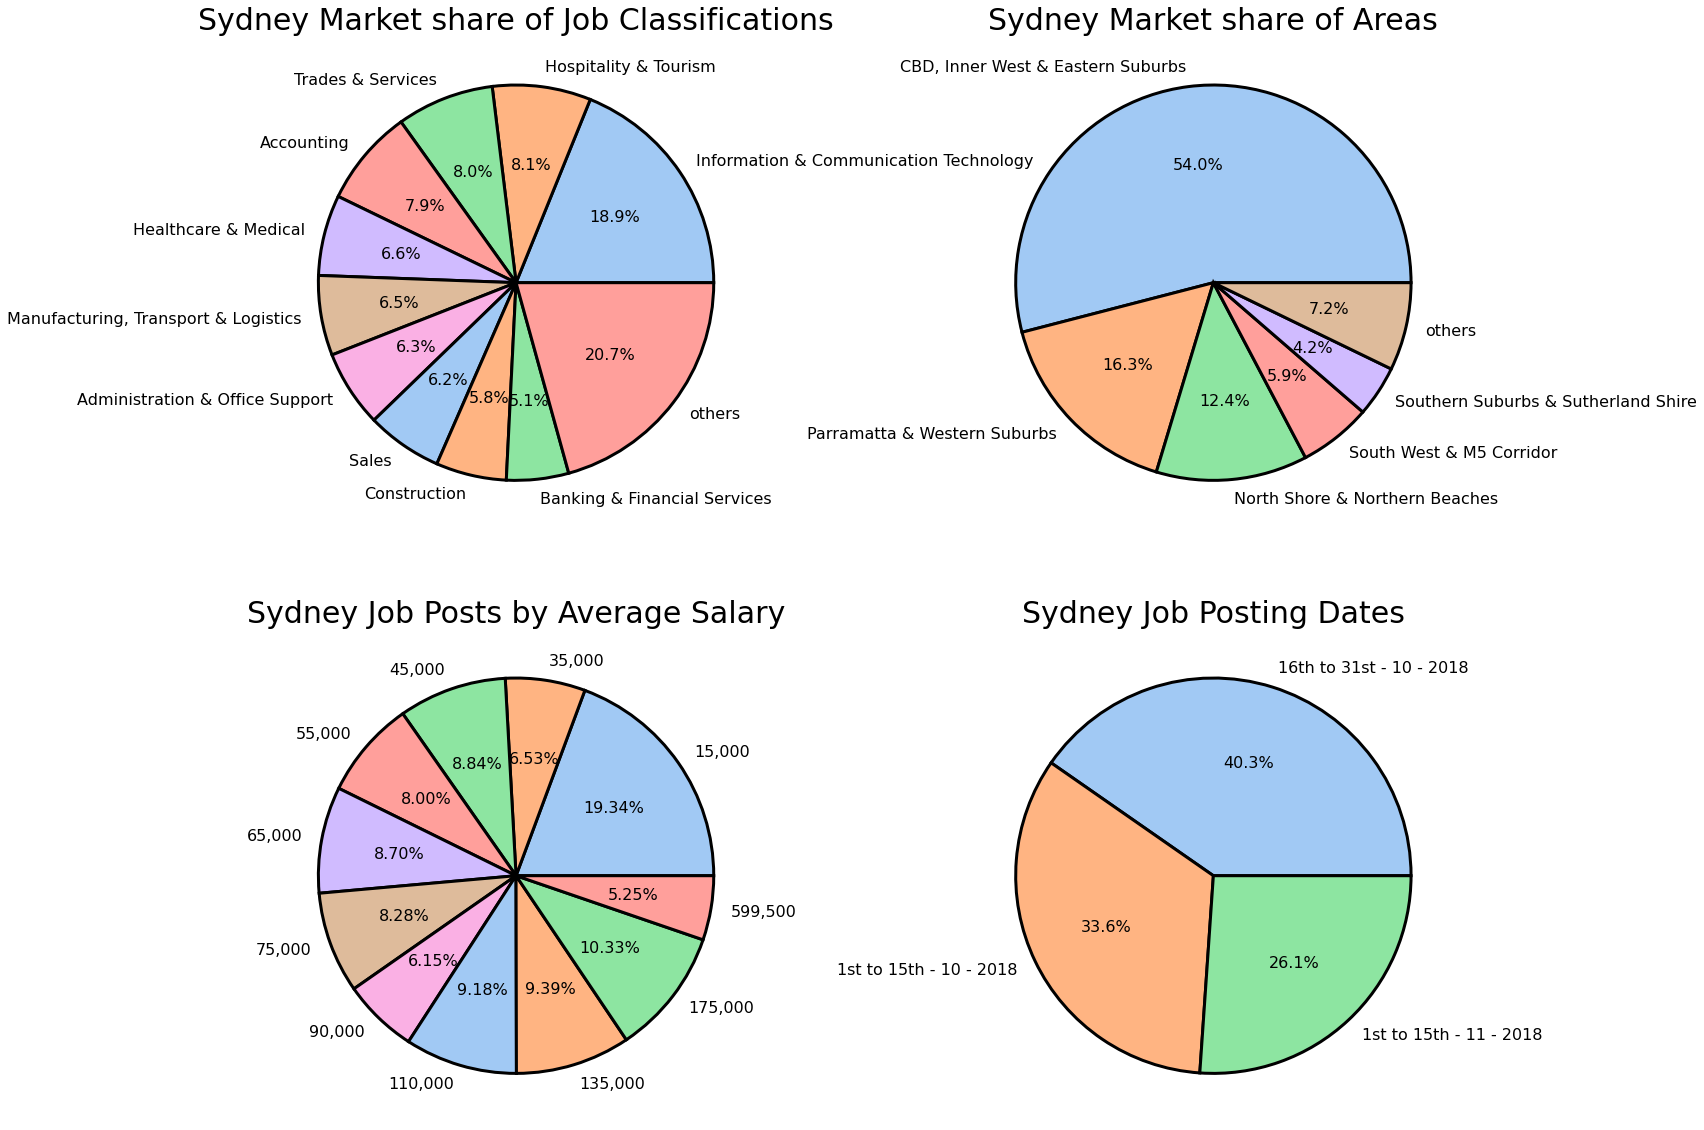

In [10]:
colors = sns.color_palette('pastel')[0:7]
# %matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(22, 20))
plt.subplot(222)
plt.pie(data=Sydney_AreaDf, x=Sydney_AreaDf.Count, labels=Sydney_AreaDf.Area, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Sydney Market share of Areas", size=30)

plt.subplot(221)
plt.pie(data=Sydney_ClassDf, x=Sydney_ClassDf.Count, labels=Sydney_ClassDf.Classification, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Sydney Market share of Job Classifications", size=30)

# plt.subplot(223)
# plt.pie(data=Sydney_HighestSalary_Df, x=Sydney_HighestSalary_Df['RangeFrequency'], labels=Sydney_HighestSalary_Df['HighestSalaryRange'], colors=colors, autopct='%0.1f%%')
# plt.title("Highest Salary Ranges", size=20)

plt.subplot(223)
plt.pie(data=SydneyAverageSalaryDf, x=SydneyAverageSalaryDf.Id, labels=labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})

plt.title("Sydney Job Posts by Average Salary", size=30);

plt.subplot(224)
plt.pie(data=Sydney_PostingData_Df, x=Sydney_PostingData_Df['PostFrequency'], labels=Sydney_PostingData_Df['PostDate'], colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Sydney Job Posting Dates", size=30)

plt.subplots_adjust(wspace = 0.315)

# MELBOURNE

### AREA AND CLASSIFICATION

In [66]:
Melbourne_Df  = df[df['Location'].isna()==False]
Melbourne_Df = Melbourne_Df[Melbourne_Df['Location'] == "Melbourne"]

Melbourne_AreaDf = Melbourne_Df.groupby('Area').count()
Melbourne_AreaDf['Area'] = Melbourne_AreaDf.index
Melbourne_AreaDf['Count'] = Melbourne_AreaDf['Id']

Melbourne_ClassDf = Melbourne_Df.groupby('Classification').count()
Melbourne_ClassDf['Classification'] = Melbourne_ClassDf.index
Melbourne_ClassDf['Count'] = Melbourne_ClassDf['Id']

Melbourne_HighSalDf = Melbourne_Df.groupby('HighestSalary').count()
Melbourne_HighSalDf['HighSal'] = Melbourne_HighSalDf.index
Melbourne_HighSalDf['Count'] = Melbourne_HighSalDf['Id']

print(Melbourne_Df.shape)
# Melbourne_Df.head()

(46690, 14)


### Job Posting Dates

In [67]:
# Check the first and last data to decide the time steps 
print("1st Date:")
print(Melbourne_Df['Date'].iloc[0].day)
print(Melbourne_Df['Date'].iloc[0].month)
print(Melbourne_Df['Date'].iloc[0].year)
print("Last Date:")
print(Melbourne_Df['Date'].iloc[-1].day)
print(Melbourne_Df['Date'].iloc[-1].month)
print(Melbourne_Df['Date'].iloc[-1].year)

FMFH = 0
FMSH = 0
SMFH = 0
SMSH = 0

for i in range(len(Melbourne_Df['Date'])):
    if Melbourne_Df['Date'].iloc[i].month == 10 and Melbourne_Df['Date'].iloc[i].day <= 15:
        FMFH += 1 #FIRST MONTH FIRST HALF
    elif Melbourne_Df['Date'].iloc[i].month == 10 and Melbourne_Df['Date'].iloc[i].day > 15 \
    and Melbourne_Df['Date'].iloc[i].day <= 31:
        FMSH += 1 #SECOND MONTH SECOND HALF
    elif Melbourne_Df['Date'].iloc[i].month == 11 and Melbourne_Df['Date'].iloc[i].day <= 15:
        SMFH += 1
    elif Melbourne_Df['Date'].iloc[i].month == 11 and Melbourne_Df['Date'].iloc[i].day > 15 \
        and Melbourne_Df['Date'].iloc[i].day <= 31:
        SMSH += 1
        
        
print(FMFH)
print(FMSH)
print(SMFH)
print(SMSH)

PostingData = {'PostDate': ['1st to 15th - 10 - 2018',
                                '16th to 31st - 10 - 2018',
                                '1st to 15th - 11 - 2018',
                                '16th to 30th - 11 - 2018'],
                   'PostFrequency': [FMFH, FMSH, SMFH, SMSH]}

Melbourne_PostingData_Df = pd.DataFrame(PostingData)

Melbourne_PostingData_Df = Melbourne_PostingData_Df.sort_values(by="PostFrequency", ascending=False)

Melbourne_PostingData_Df.head(10)

1st Date:
7
10
2018
Last Date:
29
11
2018
12605
15123
8391
365


,PostDate,PostFrequency
1,16th to 31st - 10 - 2018,15123
0,1st to 15th - 10 - 2018,12605
2,1st to 15th - 11 - 2018,8391
3,16th to 30th - 11 - 2018,365


### HIGHEST SALARY RANGES

In [68]:
(H, edges) = np.histogram(Melbourne_Df['HighestSalary'], 10)
print(edges)

range1_Count = 0
range2_Count = 0
range3_Count = 0
range4_Count = 0
range5_Count = 0
range6_Count = 0
range7_Count = 0
range8_Count = 0
range9_Count = 0
range10_Count = 0
for i in Melbourne_Df['HighestSalary']:
    if i >= edges[0] and i <= edges[1]:
        range1_Count += 1
    elif i > edges[1] and i <= edges[2]:
        range2_Count += 1
    elif i > edges[2] and i <= edges[3]:
        range3_Count += 1
    elif i > edges[3] and i <= edges[4]:
        range4_Count += 1
    elif i > edges[4] and i <= edges[5]:
        range5_Count += 1
    elif i > edges[5] and i <= edges[6]:
        range6_Count += 1
    elif i > edges[6] and i <= edges[7]:
        range7_Count += 1 
    elif i > edges[7] and i <= edges[8]:
        range8_Count += 1 
    elif i > edges[8] and i <= edges[9]:
        range9_Count += 1 
    elif i > edges[9] and i <= edges[10]:
        range10_Count += 1 
print("Range 1:",range1_Count)
print("Range 2:",range2_Count)
print("Range 3:",range3_Count)
print("Range 4:",range4_Count)
print("Range 5:",range5_Count)
print("Range 6:",range6_Count)
print("Range 7:",range7_Count)
print("Range 8:",range8_Count)
print("Range 9:",range9_Count)
print("Range 10:",range10_Count)

print("Sum of range frequency:",range1_Count+range2_Count+range3_Count+range4_Count+range5_Count+range6_Count+range7_Count+range8_Count+range9_Count+range10_Count)
print("Total number of values from Melbourne data:",Melbourne_Df.shape[0])

HighestSalary_Data = {'HighestSalaryRange':['{:f}-{:f}'.format(edges[0], edges[1]),
                                             '{:f}-{:f}'.format(edges[1], edges[2]),
                                             '{:f}-{:f}'.format(edges[2], edges[3]),
                                             '{:f}-{:f}'.format(edges[3], edges[4]),
                                             '{:f}-{:f}'.format(edges[4], edges[5]),
                                             '{:f}-{:f}'.format(edges[5], edges[6]),
                                             '{:f}-{:f}'.format(edges[6], edges[7]),
                                             '{:f}-{:f}'.format(edges[7], edges[8]),
                                             '{:f}-{:f}'.format(edges[8], edges[9]),
                                             '{:f}-{:f}'.format(edges[9], edges[10])],
                     'RangeFrequency':[range1_Count, range2_Count, range3_Count,
                                        range4_Count, range5_Count, range6_Count,
                                        range7_Count, range8_Count, range9_Count,
                                        range10_Count]}

Melbourne_HighestSalary_Df = pd.DataFrame(HighestSalary_Data)

[ 30.  126.9 223.8 320.7 417.6 514.5 611.4 708.3 805.2 902.1 999. ]
Range 1: 38086
Range 2: 6847
Range 3: 0
Range 4: 0
Range 5: 0
Range 6: 0
Range 7: 0
Range 8: 0
Range 9: 0
Range 10: 1757
Sum of range frequency: 46690
Total number of values from Melbourne data: 46690


In [69]:
print(HighestSalary_Data['RangeFrequency'])

Melbourne_HighestSalary_Df = Melbourne_HighestSalary_Df.sort_values(by="RangeFrequency", ascending=False)
#Slicing out 0 values manually
Melbourne_HighestSalary_Df = Melbourne_HighestSalary_Df[:3]
Melbourne_HighestSalary_Df.head(10)

[38086, 6847, 0, 0, 0, 0, 0, 0, 0, 1757]


,HighestSalaryRange,RangeFrequency
0,30.000000-126.900000,38086
1,126.900000-223.800000,6847
9,902.100000-999.000000,1757


In [70]:
#Sort by descending to have the top 5 AREAS at the top
Melbourne_AreaDf = Melbourne_AreaDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Melbourne_AreaDf[:4].copy()
#Add a new row that will be all of the AREAS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Area' : ['others'],
                              'Count' : [Melbourne_AreaDf['Count'][4:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Melbourne_AreaDf = pd.concat([df2, new_row])

#Sort by descending to have the top 5 CLASSIFICATIONS at the top
Melbourne_ClassDf = Melbourne_ClassDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Melbourne_ClassDf[:10].copy()
#Add a new row that will be all of the CLASSIFICATIONS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Classification' : ['others'],
                              'Count' : [Melbourne_ClassDf['Count'][10:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Melbourne_ClassDf = pd.concat([df2, new_row])
# Sydney_AreaDf.head(5)

In [71]:
#Group by average salary and count the numbers
MelbourneAverageSalaryDf = Melbourne_Df.groupby('AverageSalary').count()
MelbourneAverageSalaryDf['AverageSalary'] = (MelbourneAverageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
MelbourneAverageSalaryDf['Count'] = MelbourneAverageSalaryDf["Id"]
MelbourneAverageSalaryDf

labels = MelbourneAverageSalaryDf["AverageSalary"]
# labels = df.assign(AverageSalary = lambda row: row.AverageSalary)
print(labels)

AverageSalary
15.0      15,000
35.0      35,000
45.0      45,000
55.0      55,000
65.0      65,000
75.0      75,000
90.0      90,000
110.0    110,000
135.0    135,000
175.0    175,000
599.5    599,500
Name: AverageSalary, dtype: object


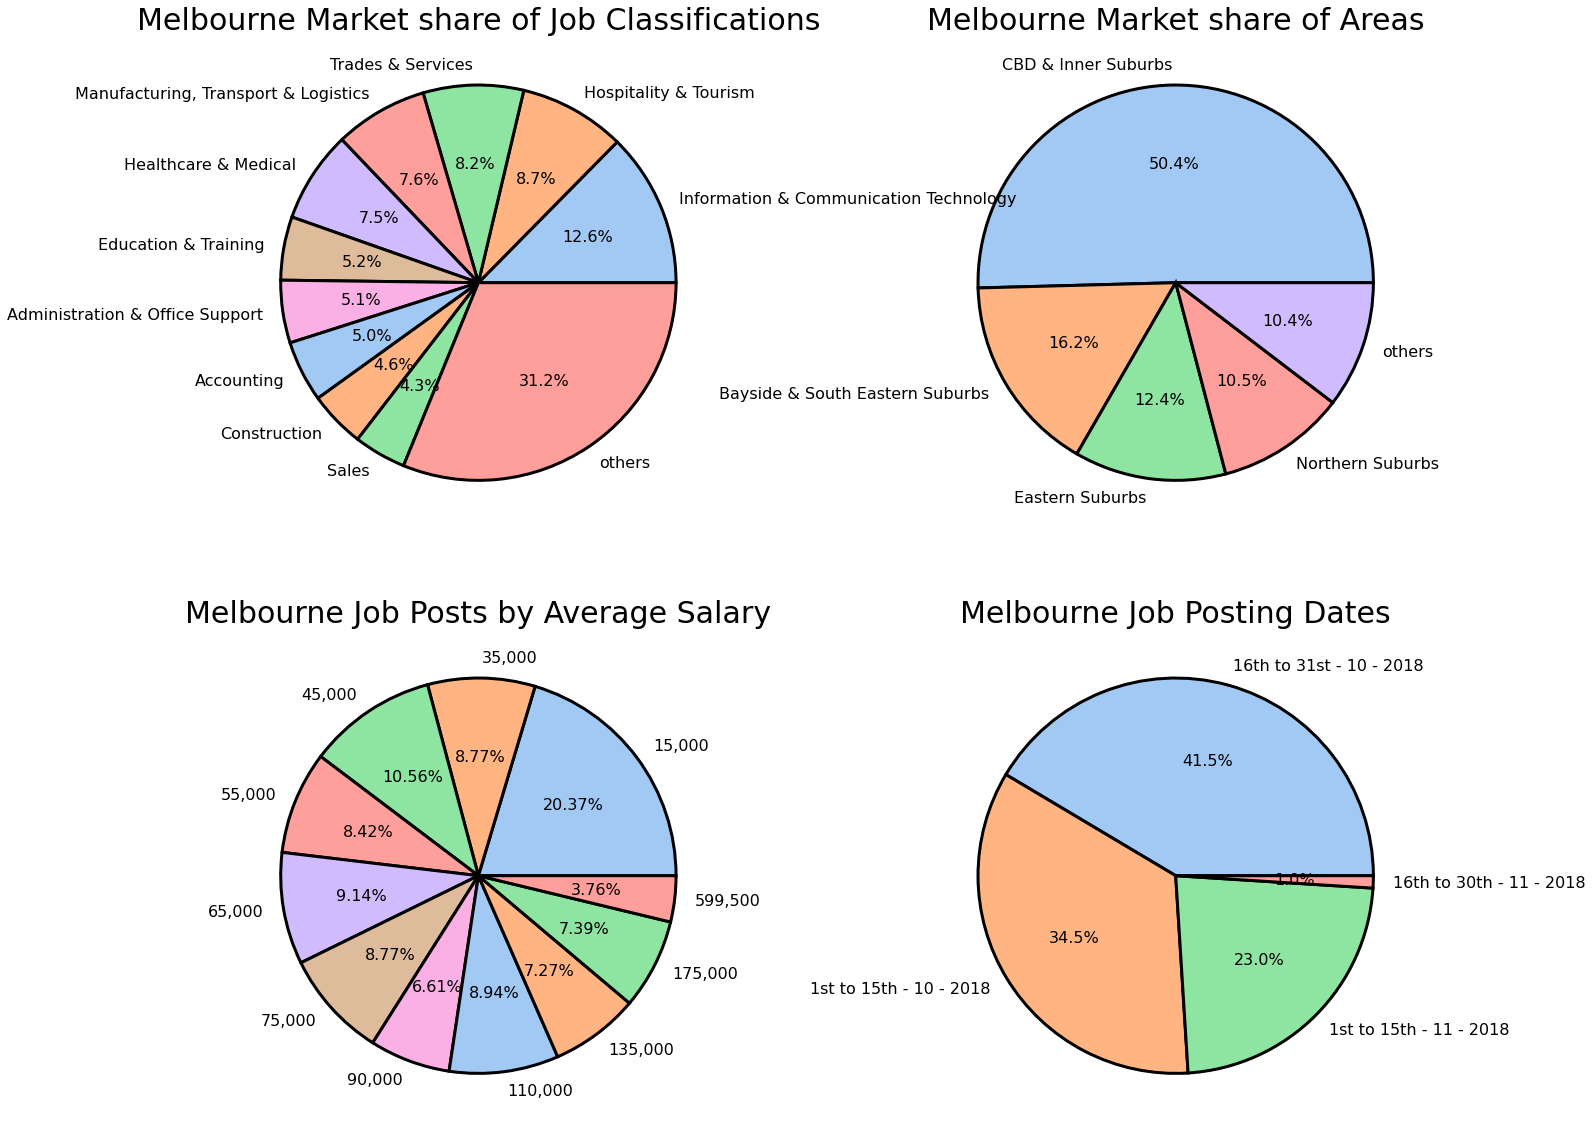

In [84]:
colors = sns.color_palette('pastel')[0:7]
# %matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(22, 20))
plt.subplot(222)
plt.pie(data=Melbourne_AreaDf, x=Melbourne_AreaDf.Count, labels=Melbourne_AreaDf.Area, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Melbourne Market share of Areas", size=30)

plt.subplot(221)
plt.pie(data=Melbourne_ClassDf, x=Melbourne_ClassDf.Count, labels=Melbourne_ClassDf.Classification, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Melbourne Market share of Job Classifications", size=30)

# plt.subplot(223)
# plt.pie(data=Melbourne_HighestSalary_Df, x=Melbourne_HighestSalary_Df['RangeFrequency'], labels=Melbourne_HighestSalary_Df['HighestSalaryRange'], colors=colors, autopct='%0.1f%%')
# plt.title("Highest Salary Ranges", size=20)


plt.subplot(223)
plt.pie(data=MelbourneAverageSalaryDf, x=MelbourneAverageSalaryDf.Id, labels=labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})

plt.title("Melbourne Job Posts by Average Salary", size=30);

plt.subplot(224)
plt.pie(data=Melbourne_PostingData_Df, x=Melbourne_PostingData_Df['PostFrequency'], labels=Melbourne_PostingData_Df['PostDate'], colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Melbourne Job Posting Dates", size=30)

plt.subplots_adjust(wspace = 0.315)

## Brisbane

### AREA AND CLASSIFICATION

In [74]:
Brisbane_Df  = df[df['Location'].isna()==False]
Brisbane_Df = Brisbane_Df[Brisbane_Df['Location'] == "Brisbane"]

Brisbane_AreaDf = Brisbane_Df.groupby('Area').count()
Brisbane_AreaDf['Area'] = Brisbane_AreaDf.index
Brisbane_AreaDf['Count'] = Brisbane_AreaDf['Id']

Brisbane_ClassDf = Brisbane_Df.groupby('Classification').count()
Brisbane_ClassDf['Classification'] = Brisbane_ClassDf.index
Brisbane_ClassDf['Count'] = Brisbane_ClassDf['Id']

Brisbane_HighSalDf = Brisbane_Df.groupby('HighestSalary').count()
Brisbane_HighSalDf['HighSal'] = Brisbane_HighSalDf.index
Brisbane_HighSalDf['Count'] = Brisbane_HighSalDf['Id']

print(Brisbane_Df.shape)

(21466, 14)


### Job Posting Dates

In [75]:
# # Check the first and last data to decide the time steps 
# print("1st Date:")
# print(Brisbane_Df['Date'].iloc[0].day)
# print(Brisbane_Df['Date'].iloc[0].month)
# print(Brisbane_Df['Date'].iloc[0].year)
# print("Last Date:")
# print(Brisbane_Df['Date'].iloc[-1].day)
# print(Brisbane_Df['Date'].iloc[-1].month)
# print(Brisbane_Df['Date'].iloc[-1].year)

FMFH = 0
FMSH = 0
SMFH = 0
SMSH = 0
count = 0

for i in range(len(Brisbane_Df['Date'])):
    if Brisbane_Df['Date'].iloc[i].month == 10 and Brisbane_Df['Date'].iloc[i].day <= 15:
        FMFH += 1 #FIRST MONTH FIRST HALF
    elif Brisbane_Df['Date'].iloc[i].month == 10 and Brisbane_Df['Date'].iloc[i].day > 15 \
    and Brisbane_Df['Date'].iloc[i].day <= 31:
        FMSH += 1 #SECOND MONTH SECOND HALF
    elif Brisbane_Df['Date'].iloc[i].month == 11 and Brisbane_Df['Date'].iloc[i].day <= 15:
        SMFH += 1
    elif Brisbane_Df['Date'].iloc[i].month == 11 and Brisbane_Df['Date'].iloc[i].day > 15 \
        and Brisbane_Df['Date'].iloc[i].day <= 31:
        SMSH += 1
    count += 1
        
print(FMFH)
print(FMSH)
print(SMFH)
print(SMSH)

print("count:", count)

PostingData = {'PostDate': ['1st to 15th - 10 - 2018',
                                '16th to 31st - 10 - 2018',
                                '1st to 15th - 11 - 2018',
                                '16th to 30th - 11 - 2018'],
                   'PostFrequency': [FMFH, FMSH, SMFH, SMSH]}

Brisbane_PostingData_Df = pd.DataFrame(PostingData)

Brisbane_PostingData_Df = Brisbane_PostingData_Df.sort_values(by="PostFrequency", ascending=False)

Brisbane_PostingData_Df.head(10)

5574
6841
4447
178
count: 21466


,PostDate,PostFrequency
1,16th to 31st - 10 - 2018,6841
0,1st to 15th - 10 - 2018,5574
2,1st to 15th - 11 - 2018,4447
3,16th to 30th - 11 - 2018,178


In [76]:
#Sort by descending to have the top 5 AREAS at the top
Brisbane_AreaDf = Brisbane_AreaDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Brisbane_AreaDf[:4].copy()
#Add a new row that will be all of the AREAS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Area' : ['others'],
                              'Count' : [Brisbane_AreaDf['Count'][4:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Brisbane_AreaDf = pd.concat([df2, new_row])

#Sort by descending to have the top 5 CLASSIFICATIONS at the top
Brisbane_ClassDf = Brisbane_ClassDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Brisbane_ClassDf[:10].copy()
#Add a new row that will be all of the CLASSIFICATIONS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Classification' : ['others'],
                              'Count' : [Brisbane_ClassDf['Count'][10:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Brisbane_ClassDf = pd.concat([df2, new_row])
# Sydney_AreaDf.head(5)

In [77]:
#Group by average salary and count the numbers
BrisbaneAverageSalaryDf = Brisbane_Df.groupby('AverageSalary').count()
BrisbaneAverageSalaryDf['AverageSalary'] = (BrisbaneAverageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
BrisbaneAverageSalaryDf['Count'] = BrisbaneAverageSalaryDf["Id"]
BrisbaneAverageSalaryDf

labels = BrisbaneAverageSalaryDf["AverageSalary"]
# labels = df.assign(AverageSalary = lambda row: row.AverageSalary)
print(labels)

AverageSalary
15.0      15,000
35.0      35,000
45.0      45,000
55.0      55,000
65.0      65,000
75.0      75,000
90.0      90,000
110.0    110,000
135.0    135,000
175.0    175,000
599.5    599,500
Name: AverageSalary, dtype: object


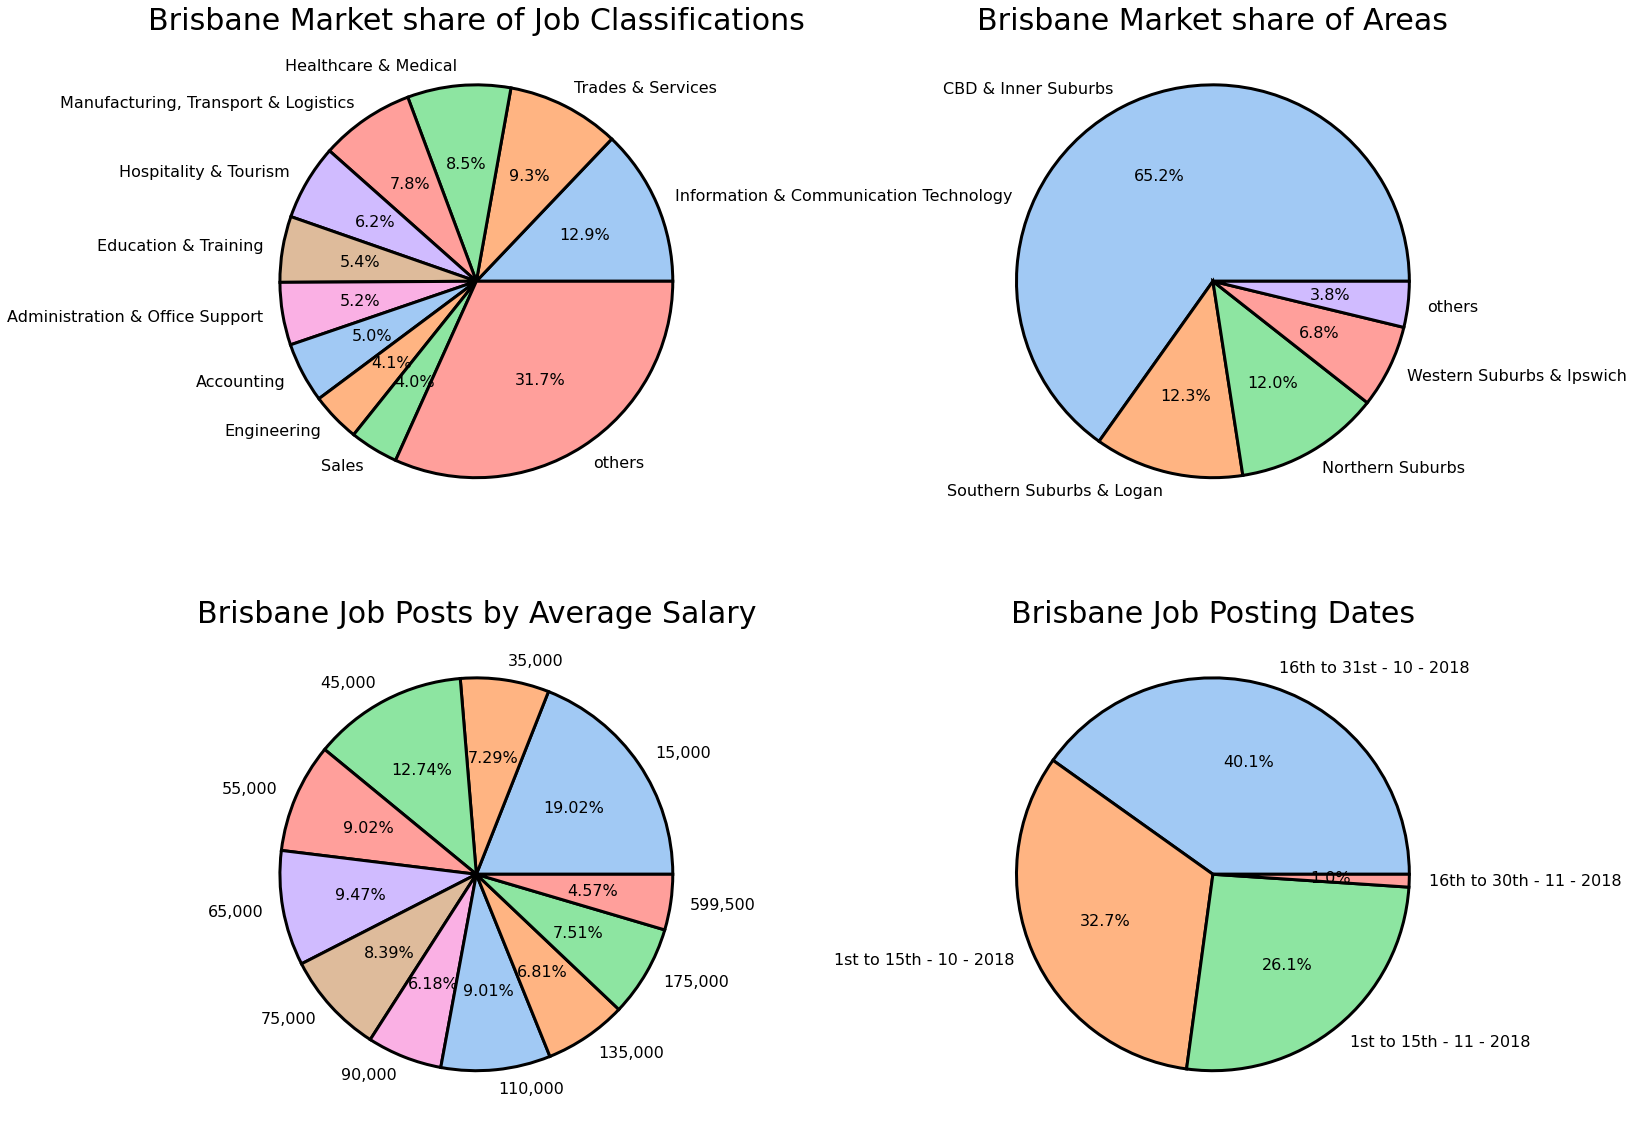

In [85]:
colors = sns.color_palette('pastel')[0:7]
# %matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(22, 20))
plt.subplot(222)
plt.pie(data=Brisbane_AreaDf, x=Brisbane_AreaDf.Count, labels=Brisbane_AreaDf.Area, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Brisbane Market share of Areas", size=30)

plt.subplot(221)
plt.pie(data=Brisbane_ClassDf, x=Brisbane_ClassDf.Count, labels=Brisbane_ClassDf.Classification, colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Brisbane Market share of Job Classifications", size=30)

plt.subplot(223)
plt.pie(data=BrisbaneAverageSalaryDf, x=BrisbaneAverageSalaryDf.Id, labels=labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})

plt.title("Brisbane Job Posts by Average Salary", size=30);

plt.subplot(224)
plt.pie(data=Brisbane_PostingData_Df, x=Brisbane_PostingData_Df['PostFrequency'], labels=Brisbane_PostingData_Df['PostDate'], colors=colors, autopct='%0.1f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 16})
plt.title("Brisbane Job Posting Dates", size=30)

plt.subplots_adjust(wspace = 0.5)